In [24]:
%matplotlib inline
import fceulib
from fceulib import VectorBytes
import numpy as np
from PIL import Image
import time

In [25]:

START = 0x08
RUN = 0x02
JUMP = 0x01
mario_y = 0x00CE
mario_x = 0x006D

def hold(mask, duration):
    return [mask for i in range(duration)]



imgBuffer = VectorBytes()
def outputImage(emu, name, buf=imgBuffer):
    emu.imageInto(buf)
    outImg = Image.frombytes("RGBA", (256, 240), str(bytearray(buf)))
    outImg.save(name + ".png")

In [34]:

emu = fceulib.runGame('mario.nes')
startInputs = hold(0x0, 120) + hold(START | JUMP, 30) + hold(0x0, 150)+ hold(START | JUMP, 30) #+ hold(0x0, 1000)
jumpInputs = [hold(0x0, 5) + hold(JUMP, t) + hold(0x0, 300)
              for t in range(5, 300)]
st = time.clock()
for m in startInputs:
    emu.step(m, 0x0)
et = time.clock()
print 'speedup',float(len(startInputs))/(60.*(et-st))
emu.stepFull(0x0, 0x0)
start = VectorBytes()
print("SAVE")
emu.save(start)

speedup 26.1680464364
SAVE


In [4]:
def pointer_to_numpy(ptr,length=0):
    if length ==0:
        length = len(ptr)
    return np.array([ptr[xx] for xx in range(length)])

emu.load(start)
nt = pointer_to_numpy(emu.fc.ppu.NTARAM)
ram_ptr = emu.fc.fceu.RAM
nt = nt[:960].reshape(30,32)
print nt
outputImage(emu, "start")

[[ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36]
 [ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36]
 [ 36  36  36  22  10  27  18  24  36  36  36  36  36  36  36  36  36  36
   32  24  27  21  13  36  36  29  18  22  14  36  36  36]
 [ 36  36  36   0   0   0   0   0   0  36  36  46  41   0   0  36  36  36
   36   1  40   1  36  36  36  36   4   0   0  36  36  36]
 [ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36]
 [ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36]
 [ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
   54  55  36  36  36  36  36  36  36  36  36  36  36  36]
 [ 36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36

In [5]:
import numpy as np
nt = np.array(nt)

import matplotlib.pyplot as plt
#plt.imshow(nt,interpolation='none')
#plt.show()

In [6]:
pt = pointer_to_numpy(emu.fc.ppu.PALRAM)
print pt

[34 41 26 15 34 54 23 15 34 48 33 15 34 39 23 15  0 22 39 24  0 26 48 39  0
 22 48 39  0 15 54 23]


 0 x: 88, y: 25, id:255, attributes:{'palette': 3, 'hflip': False, 'background': True, 'vflip': False},35
1 x: 40, y: 177, id:252, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
2 x: 48, y: 177, id:252, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
3 x: 40, y: 185, id:252, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
4 x: 48, y: 185, id:252, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
5 x: 40, y: 193, id:58, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
6 x: 48, y: 193, id:55, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
7 x: 40, y: 201, id:79, attributes:{'palette': 0, 'hflip': False, 'background': False, 'vflip': False},0
8 x: 48, y: 201, id:79, attributes:{'palette': 0, 'hflip': True, 'background': False, 'vflip': False},64
[[  88.   25.    0.]
 [  40.  177.    1.]
 [  48. 

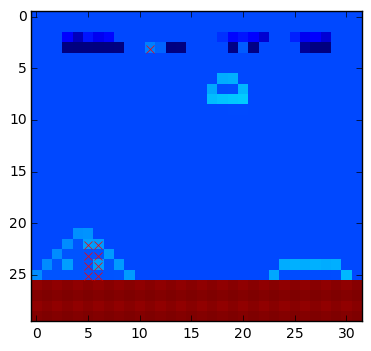

In [19]:
sprite_ram  = pointer_to_numpy(emu.fc.ppu.SPRAM)
def sprite_attributes_to_dict(attributes):
    masks = {'background' : 0x20,
        'hflip' : 0x40,
        'vflip'  : 0x80}
    sprite_attributes = {mask:attributes&masks[mask]>0 for mask in masks}
    sprite_attributes['palette'] = attributes & 0x03
    return sprite_attributes
to_plot = []
for ii in range(0,len(sprite_ram),4):
    if sprite_ram[ii] < 240:
        print ii/4,'x: {}, y: {}, id:{}, attributes:{},{}'.format(sprite_ram[ii+3],
                                                      sprite_ram[ii]+1,
                                                      sprite_ram[ii+1],
                                                      sprite_attributes_to_dict(sprite_ram[ii+2]),
                                                      sprite_ram[ii+2])
        if sprite_ram[ii+1] > 0:
            to_plot.append([sprite_ram[ii+3]*1.,sprite_ram[ii]*1.+1,ii/4])
to_plot = np.array(to_plot,dtype='float')
print to_plot
plt.plot(to_plot[:,0]/8.,to_plot[:,1]/8.,'rx')
plt.imshow(nt,interpolation='none')
plt.show()


0
0


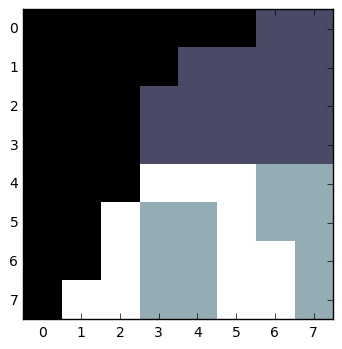

In [20]:
fg_pat_addr = 0x0000 if (emu.fc.ppu.values[0] & (1 << 4)) else 0x1000;
print fg_pat_addr
fg_ram = pointer_to_numpy(emu.fc.cart.getVPageChunk(fg_pat_addr),0x1000)
def get_sprite(tile_id):
    tile = []
    for yy in range(8):
        row = []
        lb = fg_ram[tile_id*16+yy]
        ub = fg_ram[tile_id*16+yy+8]
        for xx in range(8):
            l = lb&1
            u = ub&1
            v = l+u*2
            lb >>= 1
            ub >>= 1
            row.append(v)
        tile.append(list(reversed(row)))
    tile = np.array(tile)
    return tile
for ii in range(1):
    print ii
    plt.imshow(get_sprite(ii
                     ),interpolation='nearest', cmap=plt.get_cmap('bone'))
    plt.show()
#  const uint8 *vram = &emu->GetFC()->cart->
# VPage[bg_pat_addr >> 10][bg_pat_addr];

4096


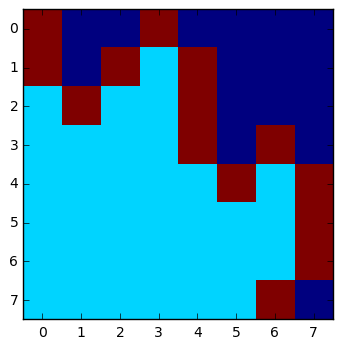

In [21]:
bg_pat_addr = 0x1000 if (emu.fc.ppu.values[0] & (1 << 4)) else 0x0000;
print bg_pat_addr
bg_ram = pointer_to_numpy(emu.fc.cart.getVPageChunk(bg_pat_addr),0x1000)
def get_tile(tile_id):
    tile = []
    for yy in range(8):
        row = []
        lb = bg_ram[tile_id*16+yy]
        ub = bg_ram[tile_id*16+yy+8]
        for xx in range(8):
            l = lb&1
            u = ub&1
            v = l+u*2
            lb >>= 1
            ub >>= 1
            row.append(v)
        tile.append(list(reversed(row)))
    tile = np.array(tile)
    return tile
plt.imshow(get_tile(56),interpolation='nearest')
plt.show()
#  const uint8 *vram = &emu->GetFC()->cart->
# VPage[bg_pat_addr >> 10][bg_pat_addr];

In [22]:
ram_ptr = pointer_to_numpy(emu.fc.fceu.RAM)
for ram_index,d in enumerate(ram_ptr):
    for sprite_index,sprite_pos in enumerate(to_plot):
        if d == sprite_pos[0]:
            print ram_index , 'possibly',sprite_index,',',sprite_pos[2],'x = ',d
        if d == sprite_pos[1]-1:
            print ram_index, 'possibly', sprite_index,',',sprite_pos[2],'y = ',d

5 possibly 1 , 1.0 x =  40
5 possibly 3 , 3.0 x =  40
5 possibly 5 , 5.0 x =  40
5 possibly 7 , 7.0 x =  40
134 possibly 1 , 1.0 x =  40
134 possibly 3 , 3.0 x =  40
134 possibly 5 , 5.0 x =  40
134 possibly 7 , 7.0 x =  40
206 possibly 1 , 1.0 y =  176
206 possibly 2 , 2.0 y =  176
240 possibly 0 , 0.0 y =  24
512 possibly 0 , 0.0 y =  24
515 possibly 0 , 0.0 x =  88
516 possibly 1 , 1.0 y =  176
516 possibly 2 , 2.0 y =  176
519 possibly 1 , 1.0 x =  40
519 possibly 3 , 3.0 x =  40
519 possibly 5 , 5.0 x =  40
519 possibly 7 , 7.0 x =  40
520 possibly 1 , 1.0 y =  176
520 possibly 2 , 2.0 y =  176
523 possibly 2 , 2.0 x =  48
523 possibly 4 , 4.0 x =  48
523 possibly 6 , 6.0 x =  48
523 possibly 8 , 8.0 x =  48
524 possibly 3 , 3.0 y =  184
524 possibly 4 , 4.0 y =  184
527 possibly 1 , 1.0 x =  40
527 possibly 3 , 3.0 x =  40
527 possibly 5 , 5.0 x =  40
527 possibly 7 , 7.0 x =  40
528 possibly 3 , 3.0 y =  184
528 possibly 4 , 4.0 y =  184
531 possibly 2 , 2.0 x =  48
531 possibly

In [11]:
help(fceulib)

Help on module fceulib:

NAME
    fceulib - Python wrapper for fceulib NES emulation

FILE
    /home/darkacloo/mechlearn/mechlearn/fceulib.so

CLASSES
    __builtin__.object
        BytePointer
        Cart
        Emulator
        FC
        FCEU
        PPU
        VectorBytes
        VectorShorts
    
    class BytePointer(__builtin__.object)
     |  Methods defined here:
     |  
     |  __getitem__(...)
     |      __getitem__(self: fceulib.BytePointer, arg0: int) -> int
     |  
     |  __init__(...)
     |      x.__init__(...) initializes x; see help(type(x)) for signature
     |  
     |  __len__(...)
     |      __len__(self: fceulib.BytePointer) -> int
     |  
     |  __setitem__(...)
     |      __setitem__(self: fceulib.BytePointer, arg0: int, arg1: float) -> None
     |  
     |  ----------------------------------------------------------------------
     |  Data and other attributes defined here:
     |  
     |  __new__ = <built-in method __new__ of type object>
     |  